## Information about the project

This dataset is dedicated to the analysis of breast cancer using a deep learning model (Keras). This is a classification problem that has as an output M= Malignant or B= Benign. The goal is to develop a model that can give the highest possible accuracy to determine if the person has a malignant tumor or a benign tumor.

## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Import dataset into a dataframe using Pandas

In [2]:
from google.colab import files
uploaded = files.upload()


Saving breast_cancer_DL.csv to breast_cancer_DL.csv


In [3]:
breast_cancer_df = pd.read_csv('breast_cancer_DL.csv')
breast_cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#Statistical values of the dataset
breast_cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#We can see that the last column has no value, so it's better to drop it
breast_cancer_cleaned = breast_cancer_df.drop('Unnamed: 32', axis=1)

In [6]:
#Visualizing the first 5 rows
breast_cancer_cleaned.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#B represents benign (non concerous tumor)
#M represents malignant (concerous tumor)
breast_cancer_cleaned['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
#We can see here that mean values of malignant row are higher than the benign ones
#This dataset has been already pre-processed and cleaned which makes it easy to use
breast_cancer_cleaned.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [9]:
#Here we split our dataset into 2 tables
#First one represents all the dependent variables or features
#The second one represents the independent variable or the ouput (diagnosis) which is binary
#I also converted the values of the diagnosis into 0 and 1 to make it understandable for the deep learning algo
X = breast_cancer_cleaned.drop(['diagnosis', 'id'], axis=1)
Y = breast_cancer_cleaned['diagnosis'].map({'M': 0, 'B': 1})

In [10]:
print(X)
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

## Train test split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 5)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


## Standardize the data

In [13]:
scaler = StandardScaler()

#We only fit the data for training
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

## Deep learning: building the neural network

In [14]:
import tensorflow as tf
tf.random.set_seed(2) #To get the same output even if we run the code again
from tensorflow import keras

In [15]:
#Here we set up the layers
#We use the sequential model to group a linear stack of layers
#Flatten layer is the input layer which is independent and is reprensented as a single dimensional array
#The number of neurons in the output is equal to the number of features in our dataset => 30 features
#Dense layers means they are interconnected to every neurons in the previous layer
#The number of neuros in the output is equal to the number of classes that we have in the output => 2
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(len((X.columns)),)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(40, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [16]:
#We compile the model using adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#here we train the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
15/15 [==============================] - 1s 22ms/step - loss: 0.6443 - accuracy: 0.6391 - val_loss: 0.5384 - val_accuracy: 0.8654
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4460 - accuracy: 0.9000 - val_loss: 0.4436 - val_accuracy: 0.8269
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.9413 - val_loss: 0.3348 - val_accuracy: 0.9038
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9500 - val_loss: 0.2671 - val_accuracy: 0.9038
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1535 - accuracy: 0.9543 - val_loss: 0.2297 - val_accuracy: 0.9038
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9652 - val_loss: 0.2116 - val_accuracy: 0.9038
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9739 - val_loss: 0.2018 - val_accuracy: 0.9038
Epoch 8/10
15/15 [=

# Visualizing accuracy and loss

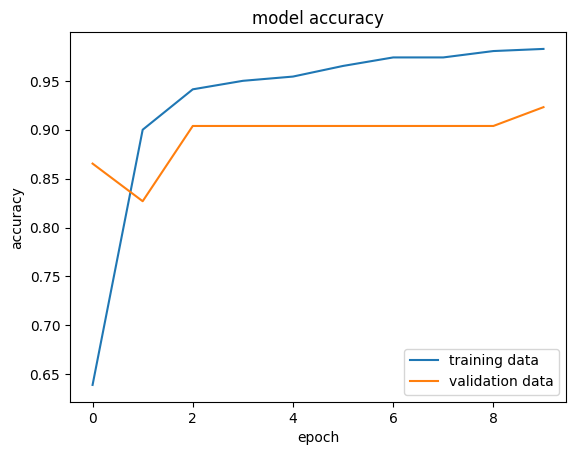

In [18]:
#Here we plot the model accuracy and we compare the training data to the validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

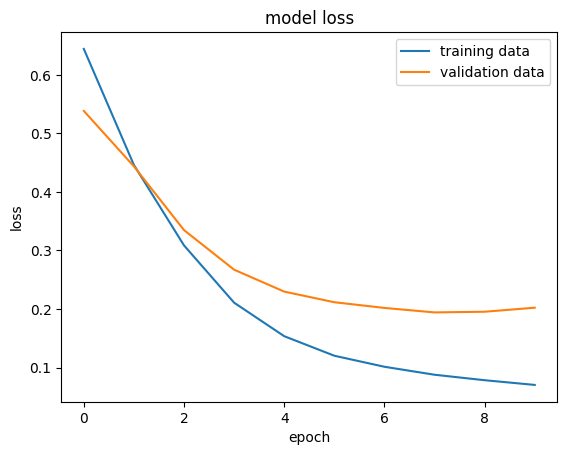

In [19]:
#Visualizing the model loss
#After tweaking the parameters of the model we can see that the loss goes down until the minimum value and then rises up
#It signifies that overtraining the model (using higher epochs number) isn't always the best thing to do
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [21]:
#Accuracy of the model
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("The accuracy of the model is: " , accuracy*100, "%")

2/2 [==============================] - 0s 8ms/step - loss: 0.0976 - accuracy: 0.9825
The accuracy of the model is:  98.24561476707458 %


In [22]:
Y_pred = model.predict(X_test_std)

2/2 [==============================] - 0s 5ms/step


In [23]:
#This gives us all the values of the independent variables (features) of the dataset
X_test_std

array([[ 0.34909306,  1.42699726,  0.44938437, ...,  1.3711359 ,
         1.81940113,  0.80907502],
       [-0.50817864,  0.7110435 , -0.49978256, ..., -0.49287064,
        -1.03175863,  0.37291283],
       [ 0.11739801, -1.94854867,  0.10760009, ...,  0.12856804,
        -0.02518091, -0.21815834],
       ...,
       [-0.13746655,  0.94812983, -0.19082978, ..., -0.65070616,
        -0.42554274, -0.79659509],
       [ 1.97675083,  1.38474425,  2.15830577, ...,  2.17269276,
         0.03965502,  0.80742705],
       [ 0.39543207,  1.11714186,  0.5083127 , ...,  1.58622548,
         0.17581046,  1.2452372 ]])

In [24]:
#the prediction for the output is binary => 1: M / 0: B
#These values here should be converted into 0 or 1 to make it easier to interpret
Y_pred

array([[9.19086933e-01, 2.36147251e-02],
       [1.70644701e-01, 8.46811175e-01],
       [1.30359381e-01, 9.37272906e-01],
       [1.64587766e-01, 9.02699530e-01],
       [2.27192685e-01, 8.22570860e-01],
       [9.71015096e-01, 1.47586063e-04],
       [1.75713509e-01, 9.05809045e-01],
       [4.86174114e-02, 9.88941252e-01],
       [3.37181121e-01, 5.83478689e-01],
       [7.66269565e-02, 9.55124319e-01],
       [2.76819110e-01, 7.84571350e-01],
       [3.61974388e-01, 4.42960769e-01],
       [9.86761510e-01, 6.35802688e-04],
       [1.12852015e-01, 9.02307987e-01],
       [1.04848176e-01, 9.47768748e-01],
       [5.15510440e-02, 9.90586638e-01],
       [5.41984886e-02, 9.82812703e-01],
       [6.01416230e-02, 9.83621955e-01],
       [1.35255888e-01, 9.04180586e-01],
       [2.32352674e-01, 9.09067392e-01],
       [7.30524182e-01, 1.97046936e-01],
       [1.17129892e-01, 9.65271056e-01],
       [4.80139479e-02, 9.82495070e-01],
       [1.33247316e-01, 9.17873800e-01],
       [1.636688

In [25]:
# converting the prediction probability to class labels using the argmax function from numpy

Y_pred_class = [np.argmax(i) for i in Y_pred]
print(Y_pred_class)

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]


In [26]:
input_data = (11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.183,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.99,16.3,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772)

# convert input_data to a numpy array
input_data_array = np.asarray(input_data)

# reshape the array for one data point
input_data_reshaped = input_data_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_class = [np.argmax(prediction)]
print(prediction_class)

if(prediction_class[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
[[0.04617985 0.98792505]]
[1]
The tumor is Benign
